# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_hh_income = pd.read_csv('/content/drive/MyDrive/100days/0100/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/content/drive/MyDrive/100days/0100/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/content/drive/MyDrive/100days/0100/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/content/drive/MyDrive/100days/0100/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/content/drive/MyDrive/100days/0100/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print('The shape of df_hh_income is:')
print(df_hh_income.shape)

print('The shape of df_pct_poverty is:')
print(df_pct_poverty.shape)

print('The shape of df_pct_completed_hs is:')
print(df_pct_completed_hs.shape)

print('The shape of df_share_race_city is:')
print(df_share_race_city.shape)

print('The shape of df_fatalities is:')
print(df_fatalities.shape)


The shape of df_hh_income is:
(29322, 3)
The shape of df_pct_poverty is:
(29329, 3)
The shape of df_pct_completed_hs is:
(29329, 3)
The shape of df_share_race_city is:
(29268, 7)
The shape of df_fatalities is:
(2535, 14)


In [8]:
print('The columns in df_hh_income is:')
print(df_hh_income.columns)

print('The columns in df_pct_poverty is:')
print(df_pct_poverty.columns)

print('The columns in df_pct_completed_hs is:')
print(df_pct_completed_hs.columns)

print('The columns in df_share_race_city is:')
print(df_share_race_city.columns)

print('The columns in df_fatalities is:')
print(df_fatalities.columns)

The columns in df_hh_income is:
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
The columns in df_pct_poverty is:
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
The columns in df_pct_completed_hs is:
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
The columns in df_share_race_city is:
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
The columns in df_fatalities is:
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [9]:
print(df_hh_income.isna().any())

print(df_pct_poverty.isna().any())

print(df_pct_completed_hs.isna().any())

print(df_share_race_city.isna().any())

print(df_fatalities.isna().any())



#####
# duplicates
print(df_hh_income.duplicated().any())
# print(dup_df_hh_incomena)

# dup_df_pct_poverty = df_pct_poverty.duplicated().any(axis=1)
# print(dup_df_pct_poverty)
print(df_pct_poverty.duplicated().any())

# dup_df_pct_completed_hs = df_pct_completed_hs.duplicated().any(axis=1)
# print(dup_df_pct_completed_hs)
print(df_pct_completed_hs.duplicated().any())

# dup_df_share_race_city = df_share_race_city.duplicated().any(axis=1)
# print(dup_df_share_race_city)
print(df_share_race_city.duplicated().any())

# dup_df_fatalities = df_fatalities.duplicated().any(axis=1)
# print(dup_df_fatalities)
print(df_fatalities.duplicated().any())


Geographic Area    False
City               False
Median Income       True
dtype: bool
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool
id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool
False
False
False
Fal

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [10]:
df_hh_income.fillna(0, inplace=True)

df_pct_poverty.fillna(0, inplace=True)

df_pct_completed_hs.fillna(0, inplace=True)

df_share_race_city.fillna(0, inplace=True)

df_fatalities.fillna(0, inplace=True)

In [11]:
df_hh_income.drop_duplicates()

df_pct_poverty.drop_duplicates()

df_pct_completed_hs.drop_duplicates()

df_share_race_city.drop_duplicates()

df_fatalities.drop_duplicates()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
poverty_by_area = df_pct_poverty.groupby(['Geographic Area']).size().to_frame('size').reset_index().sort_values(by='size')

In [107]:
px.bar(
    poverty_by_area,
    x='Geographic Area',
    y='size'
)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
for row in df_pct_completed_hs.index:
  df_pct_completed_hs.loc[row, ['percent_completed_hs']].fillna(0, inplace=True)
  price = df_pct_completed_hs.loc[row, ['percent_completed_hs']]
  try:
    intprice = float(price)
  except ValueError:
    try:
      intprice = float(price.str.replace(",",""))
    except ValueError:
      intprice = float(price.str.replace("-","0"))
  df_pct_completed_hs.loc[row, ['percent_completed_hs_clean']] = intprice
completed_hs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs_clean'].mean().to_frame('mean').reset_index().sort_values(by='mean')
# completed_hs_by_area = df_pct_completed_hs.groupby(['Geographic Area']).size().to_frame('size').reset_index().sort_values(by='size')
px.bar(
    completed_hs,
    x='Geographic Area',
    y='mean'
)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

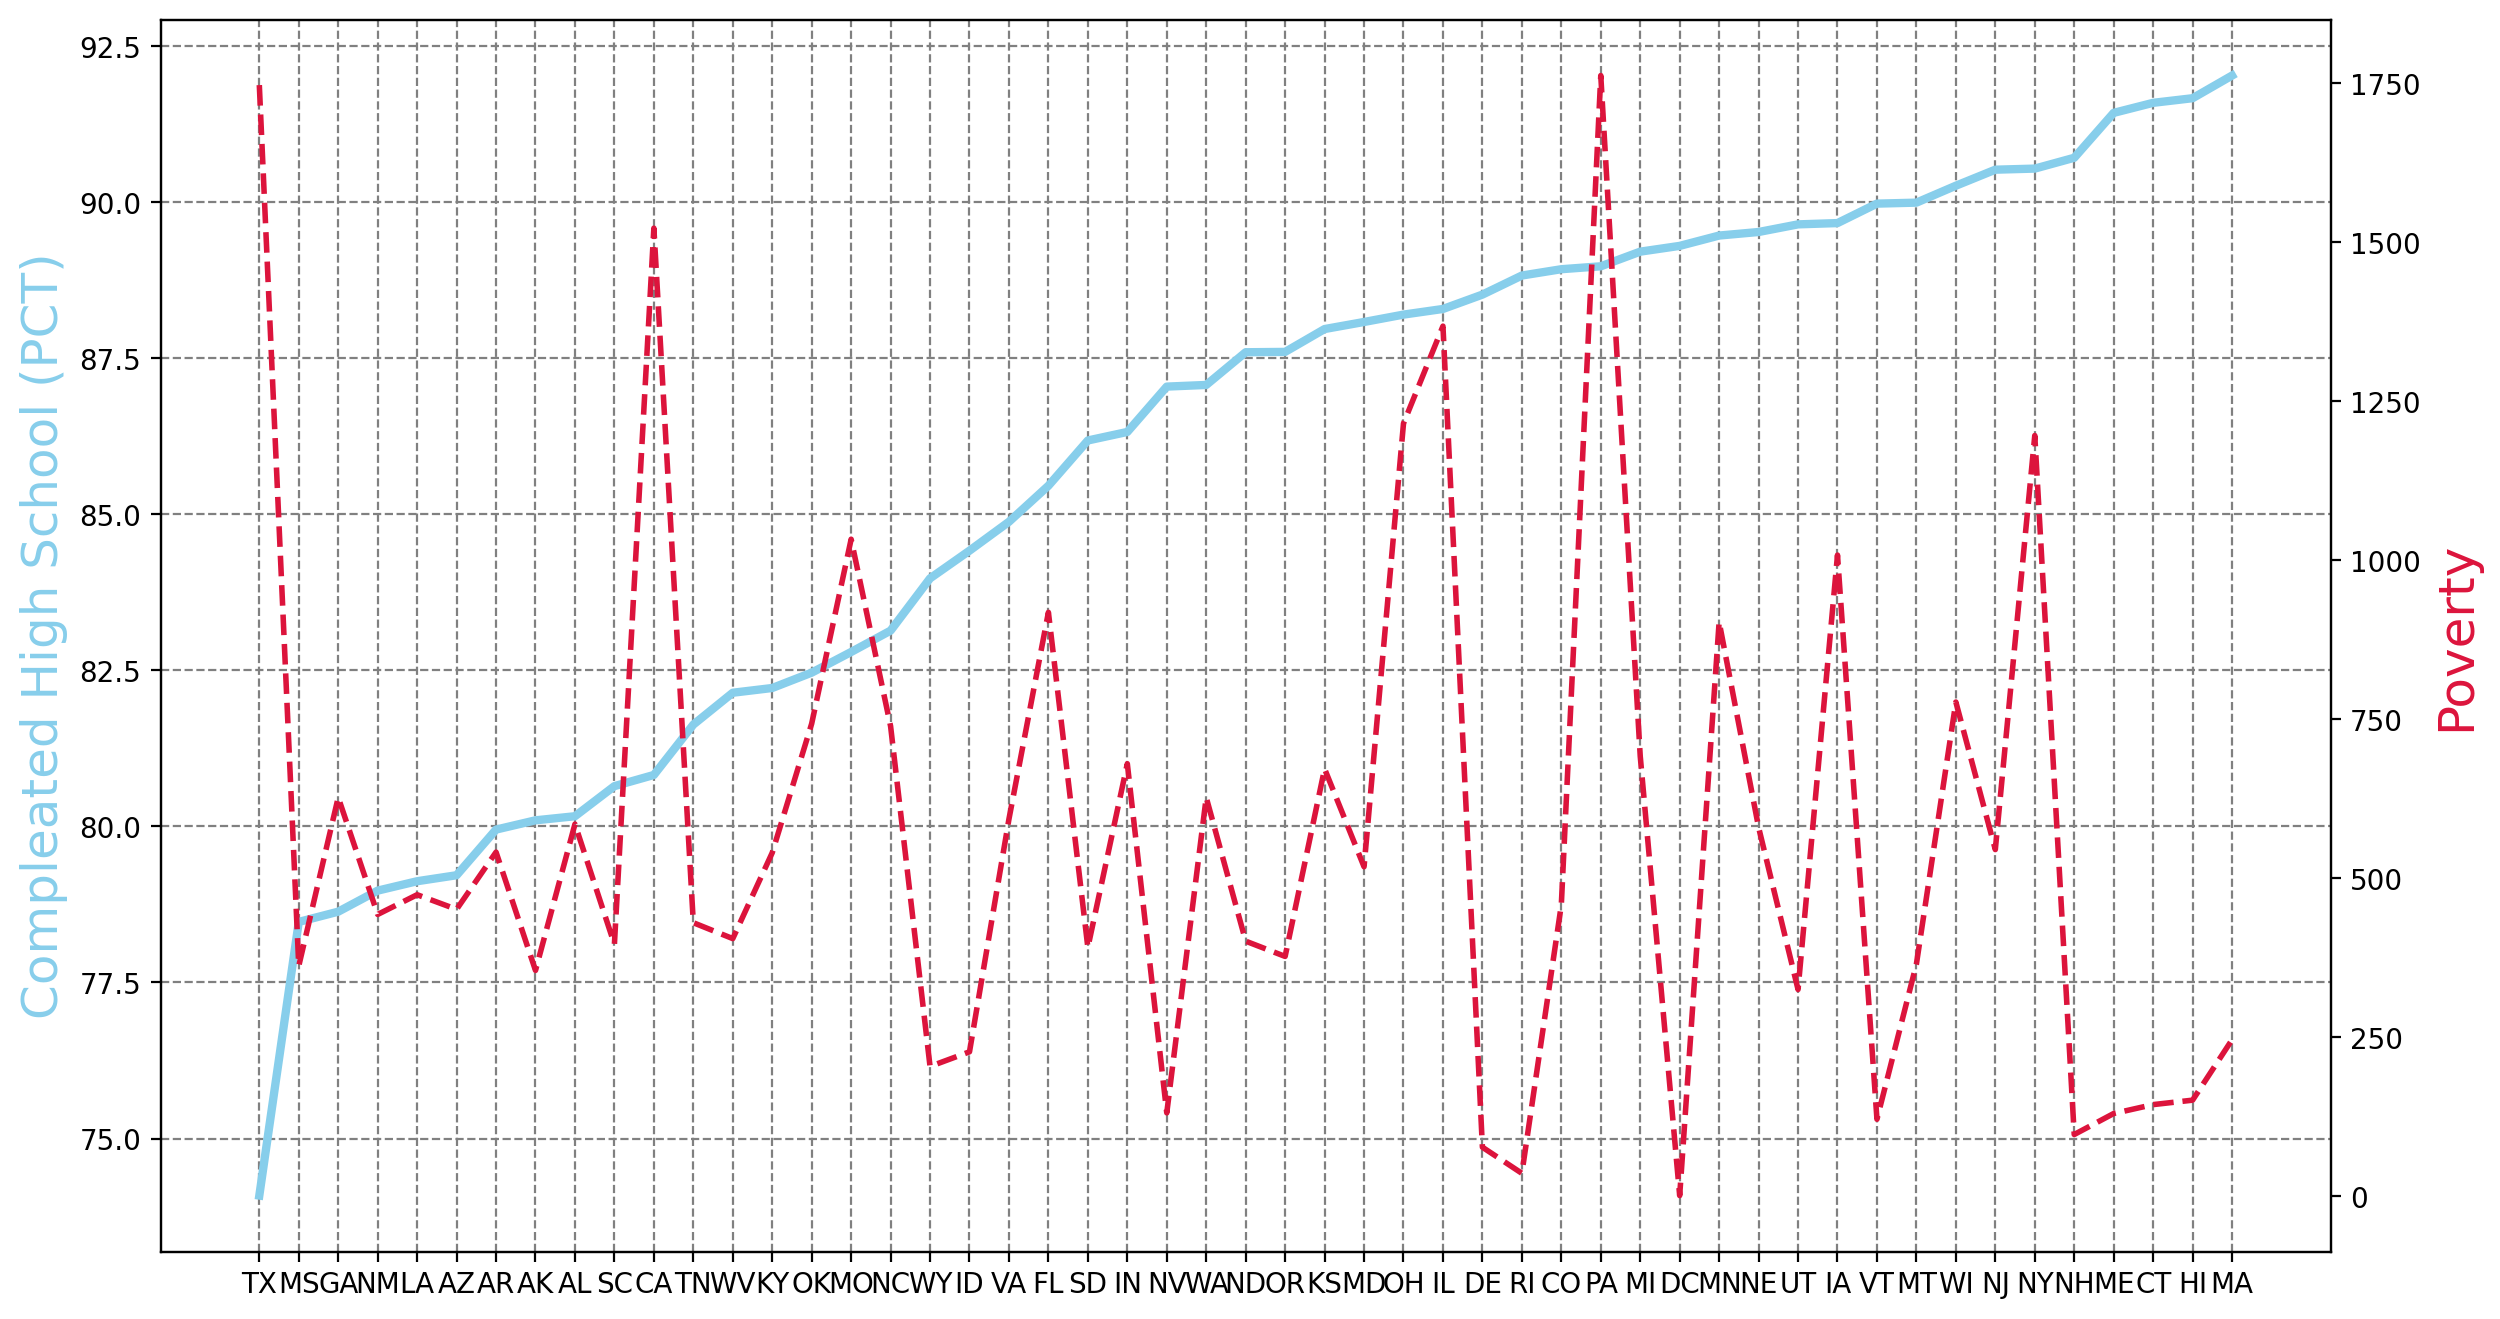

In [15]:
# px.line(
#     completed_hs,
#     x='Geographic Area',
#     y='mean'
# )
# px.line(
#     poverty_by_area,
#     x='Geographic Area',
#     y='size'
# )
result = completed_hs.set_index('Geographic Area').join(poverty_by_area.set_index('Geographic Area'))
result

plt.figure(figsize=(14,8), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(
    color='grey',
    linestyle='--'
)
ax1.plot(
    # result['Geographic Area'],
    result['mean'],
    color='skyblue',
    linewidth=3
)
ax2.plot(
    # result['Geographic Area'],
    result['size'],
    color='crimson',
    linewidth=2,
    linestyle='--'
)
ax1.set_ylabel(
    'Compleated High School (PCT)',
    color='skyblue',
    fontsize=18
    )
ax2.set_ylabel(
    'Poverty',
    color='crimson',
    fontsize=18
)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

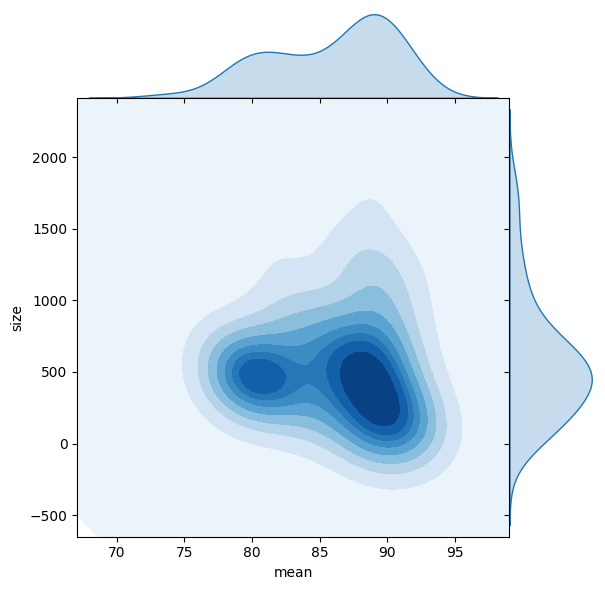

In [16]:
sns.jointplot(x=result['mean'], y=result['size'], kind='kde', space=0, fill=True, thresh=0, cmap='Blues');

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

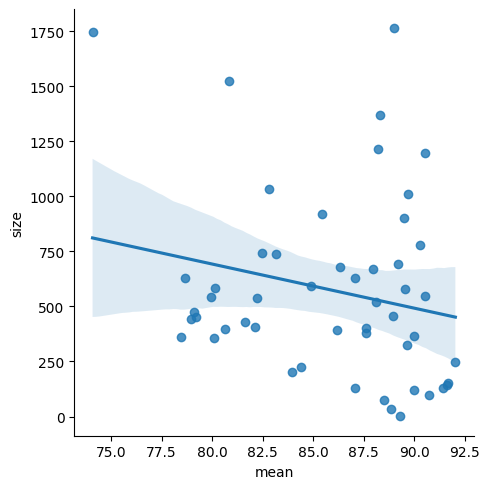

In [17]:
sns.lmplot(data=result, x='mean', y='size')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [18]:
for row in df_share_race_city.index:
  races = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
  for i in races:
    df_share_race_city.loc[row, [i]].fillna(0, inplace=True)
    price = df_share_race_city.loc[row, [i]]

    try:
      intprice = float(price)
    except ValueError:
      intprice = float(price.replace("(X)","0"))

    df_share_race_city.loc[row, [f'{ i }_clean']] = intprice
state_race = df_share_race_city.groupby('Geographic area').sum()
state_race

<ipython-input-18-ff2762d3c1f7>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,share_white_clean,share_black_clean,share_native_american_clean,share_asian_clean,share_hispanic_clean
Geographic area,,,,,
AK,"16,068.80",199.70,"16,144.40",488.70,756.50
AL,"41,909.20","13,480.30",381.10,277.30,"1,722.50"
AR,"42,441.20","8,816.60",411.10,258.10,"2,311.70"
AZ,"27,028.00",430.50,"12,894.00",327.70,"9,085.20"
CA,"108,949.30","4,081.10","2,612.20","8,441.40","44,949.20"
CO,"40,197.90",420.30,744.20,528.90,"8,197.60"
CT,"12,313.10",713.90,93.90,427.50,"1,140.50"
DC,38.50,50.70,0.30,3.50,9.10
DE,"5,794.70","1,169.90",39.80,152.00,563.70


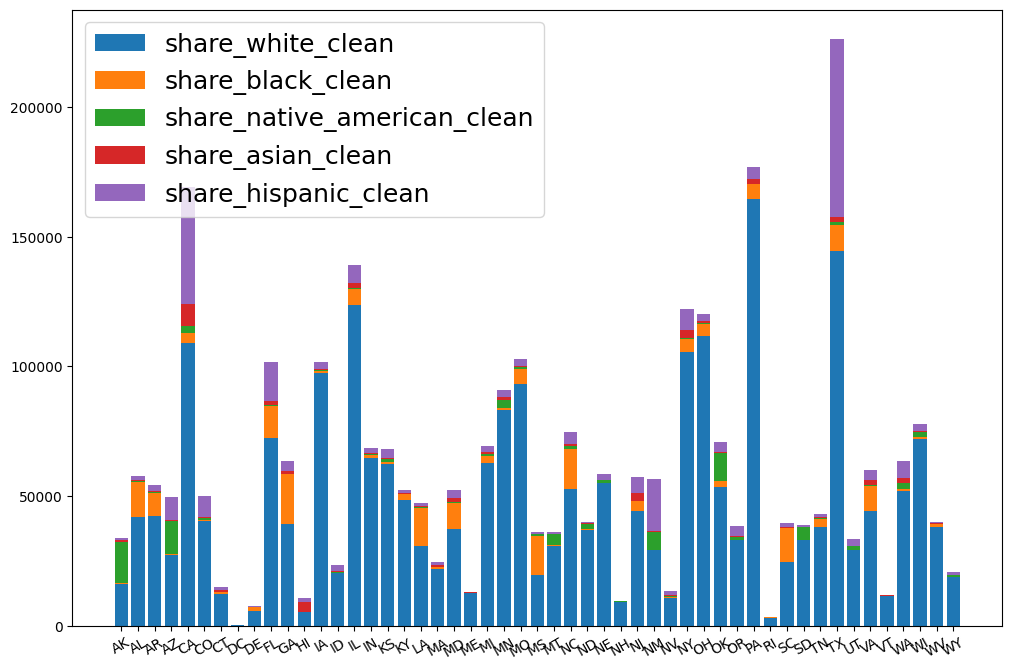

In [19]:
# state_race.astype('float')
new_dataset = state_race[['share_white_clean','share_black_clean','share_native_american_clean','share_asian_clean','share_hispanic_clean']].copy()
cumval=0
fig = plt.figure(figsize=(12,8))
for col in new_dataset.columns[~new_dataset.columns.isin([new_dataset.index])]:
    plt.bar(new_dataset.index, new_dataset[col], bottom=cumval, label=col)
    cumval = cumval+new_dataset[col]

_ = plt.xticks(rotation=30)
_ = plt.legend(fontsize=18)


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [20]:
race_count = df_fatalities.race.value_counts()

In [21]:
fig = px.pie(labels=df_fatalities.index,
             values=race_count.values,
             title="Deaths by race",
             names=race_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [22]:
gender_count = df_fatalities.gender.value_counts()

In [23]:
fig = px.pie(labels=gender_count.index,
             values=gender_count.values,
             title="Deaths by Gender",
             names=gender_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [24]:
men_woman_methods = df_fatalities.groupby(['manner_of_death','gender']).size().to_frame('size').reset_index().sort_values(by='size')
men_woman_methods

,manner_of_death,gender,size
2,shot and Tasered,F,5
0,shot,F,102
3,shot and Tasered,M,167
1,shot,M,2261


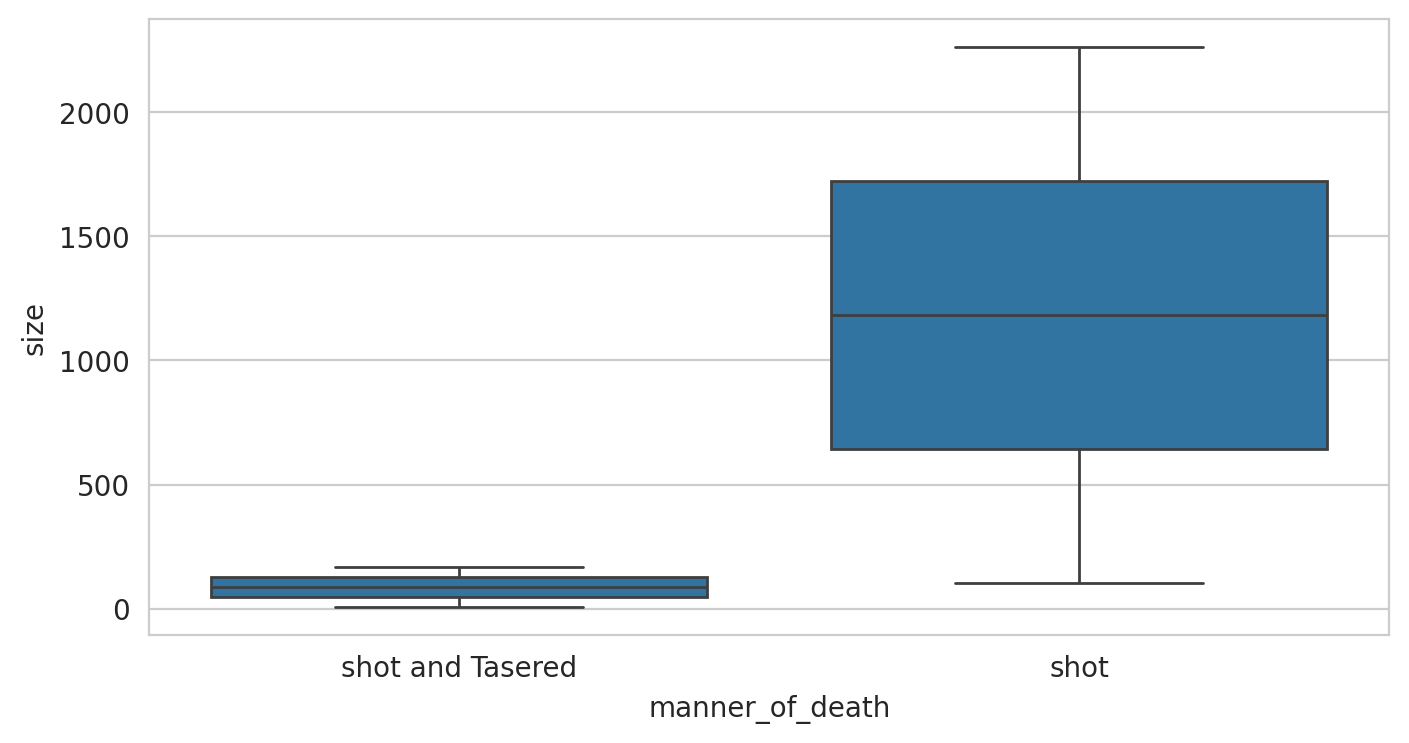

In [25]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(
      data=men_woman_methods,
      x='manner_of_death',
      y='size'
  )
  plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [26]:
armed_count = df_fatalities.armed.value_counts()

In [27]:
fig = px.pie(labels=armed_count.index,
             values=armed_count.values,
             title="Armed deaths",
             names=armed_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [28]:

# (df_fatalities['age'] <25).count()
s_bool = (df_fatalities['age'] < 25)
percent = s_bool.sum() / len(df_fatalities) * 100
print(f'The percentage of deaths under 25 are: { percent }%')
# print(s_bool.sum())

The percentage of deaths under 25 are: 20.78895463510848%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

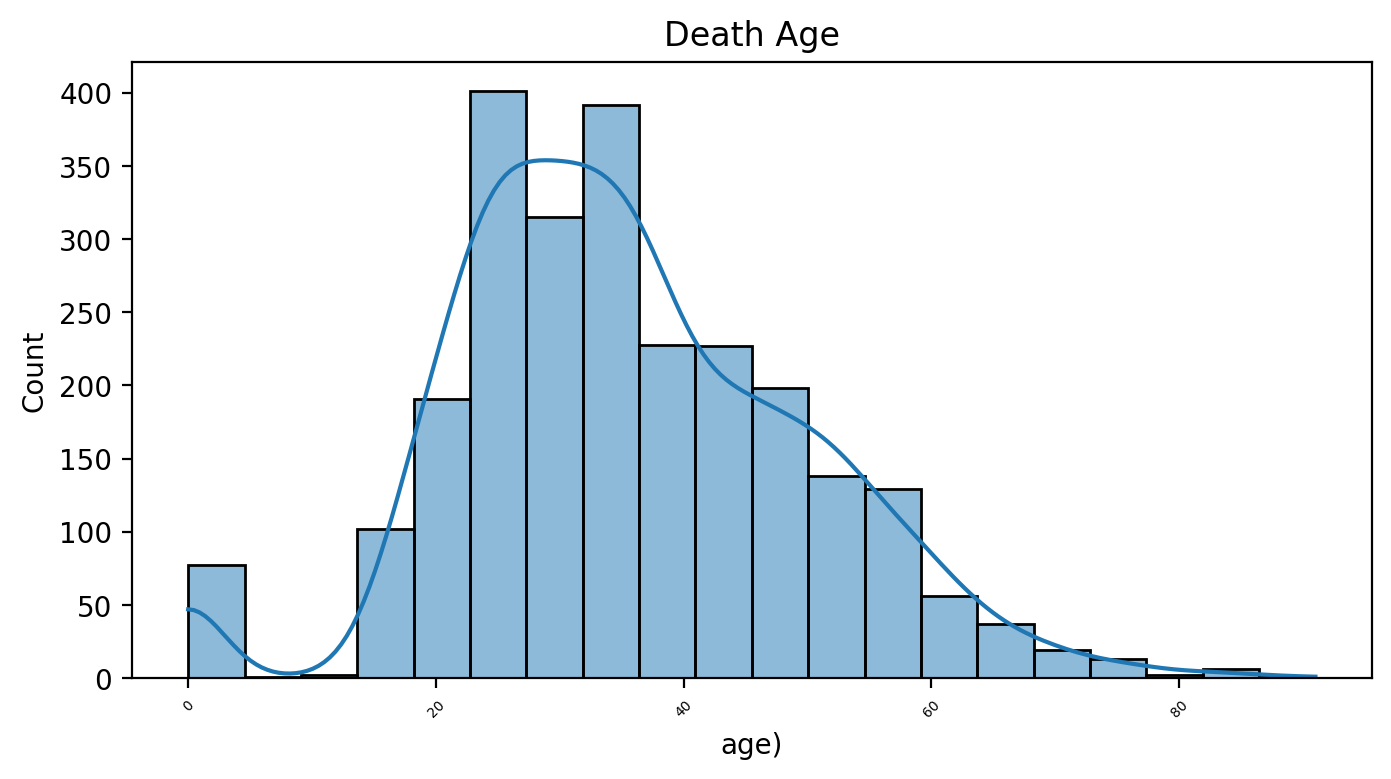

In [29]:
plt.figure(
    figsize=(
        8,
        4
    ),
    dpi=200
)
# sns.kdeplot(df_fatalities.age)
sns.histplot(
    data=df_fatalities,
    x=df_fatalities.age,
    kde=True,
    bins=20

)

plt.xlabel('age)')
plt.xticks(rotation = 45, fontsize=5)
plt.title('Death Age')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

race
0    Axes(0.125,0.11;0.775x0.77)
A    Axes(0.125,0.11;0.775x0.77)
B    Axes(0.125,0.11;0.775x0.77)
H    Axes(0.125,0.11;0.775x0.77)
N    Axes(0.125,0.11;0.775x0.77)
O    Axes(0.125,0.11;0.775x0.77)
W    Axes(0.125,0.11;0.775x0.77)
Name: size, dtype: object

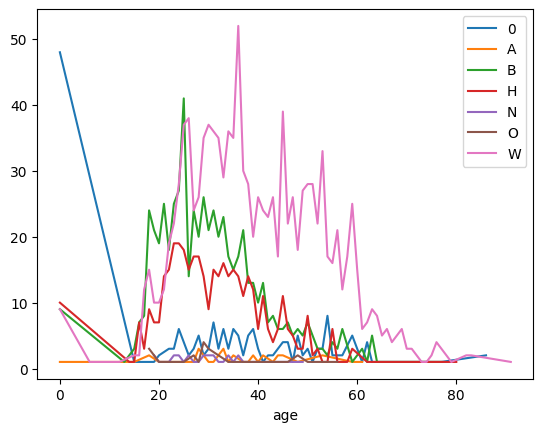

In [30]:
df = df_fatalities.groupby(['race','age']).size().to_frame('size').reset_index().sort_values(by='age')
df.columns
# #define index column
df.set_index('age', inplace=True)

# #group data by product and display sales as line chart
df.groupby('race')['size'].plot(legend=True)


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [31]:
race_count = df_fatalities.race.value_counts()

In [32]:
fig = px.pie(labels=race_count.index,
             values=race_count.values,
             title="Deaths per race",
             names=race_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [33]:
mental_illness_count = df_fatalities.signs_of_mental_illness.value_counts()

In [34]:
fig = px.pie(labels=mental_illness_count.index,
             values=mental_illness_count.values,
             title="signs_of_mental_illness",
             names=mental_illness_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [51]:
city_count = df_fatalities.city.value_counts().nlargest(10)

In [36]:
fig = px.pie(labels=city_count.index,
             values=city_count.values,
             title="city_count",
             names=city_count.index,
             hole=0.4,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [37]:
city_count

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [50]:
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Los Angeles')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Phoenix')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Houston')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Chicago')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('San Antonio')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Columbus')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Austin')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Miami')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('St. Louis')])
print(df_share_race_city.loc[df_share_race_city['City'].str.contains('Las Vegas')])

      Geographic area                                   City share_white  \
2320               CA                   East Los Angeles CDP        50.5   
2474               CA  Green Valley CDP (Los Angeles County)        87.7   
2627               CA                   Lake Los Angeles CDP        55.7   
2714               CA                       Los Angeles city        49.8   
25400              TX                        Los Angeles CDP        63.6   

      share_black share_native_american share_asian share_hispanic  \
2320          0.6                   1.2         0.9           97.1   
2474          0.8                   1.1         1.2             12   
2627         11.3                   1.4         0.9           53.6   
2714          9.6                   0.7        11.3           48.5   
25400         9.1                     0           0            100   

       share_white_clean  share_black_clean  share_native_american_clean  \
2320               50.50               0.60   

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [93]:
# %pip install addfips
import addfips
af = addfips.AddFIPS()

for row in df_fatalities.index:
  fips = af.get_state_fips(df_fatalities.loc[row, 'state'])
  df_fatalities.loc[row, ['fips']] = fips
total_city_count = df_fatalities.state.value_counts().to_frame()
# print(type(total_city_count))
total_city_count




,state
CA,424
TX,225
FL,154
AZ,118
OH,79
OK,78
CO,74
GA,70
NC,69
MO,64


In [94]:
US_map = px.choropleth(
                          locations=total_city_count.index,
                          color=total_city_count.state,
                          color_continuous_scale=px.colors.sequential.matter,
                          # hover_name=total_city_count.state.unique()
                          scope="usa",
                          locationmode="USA-states"
                          )
US_map.update_layout(coloraxis_showscale=True)
US_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [106]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities.head()
df = df_fatalities.groupby('date').size().to_frame('size').reset_index().sort_values(by='date')
df



,date,size
0,2015-01-03,3
1,2015-01-04,2
2,2015-01-06,1
3,2015-01-07,2
4,2015-01-08,2
...,...,...
874,2017-12-03,2
875,2017-12-04,1
876,2017-12-05,4
877,2017-12-06,4


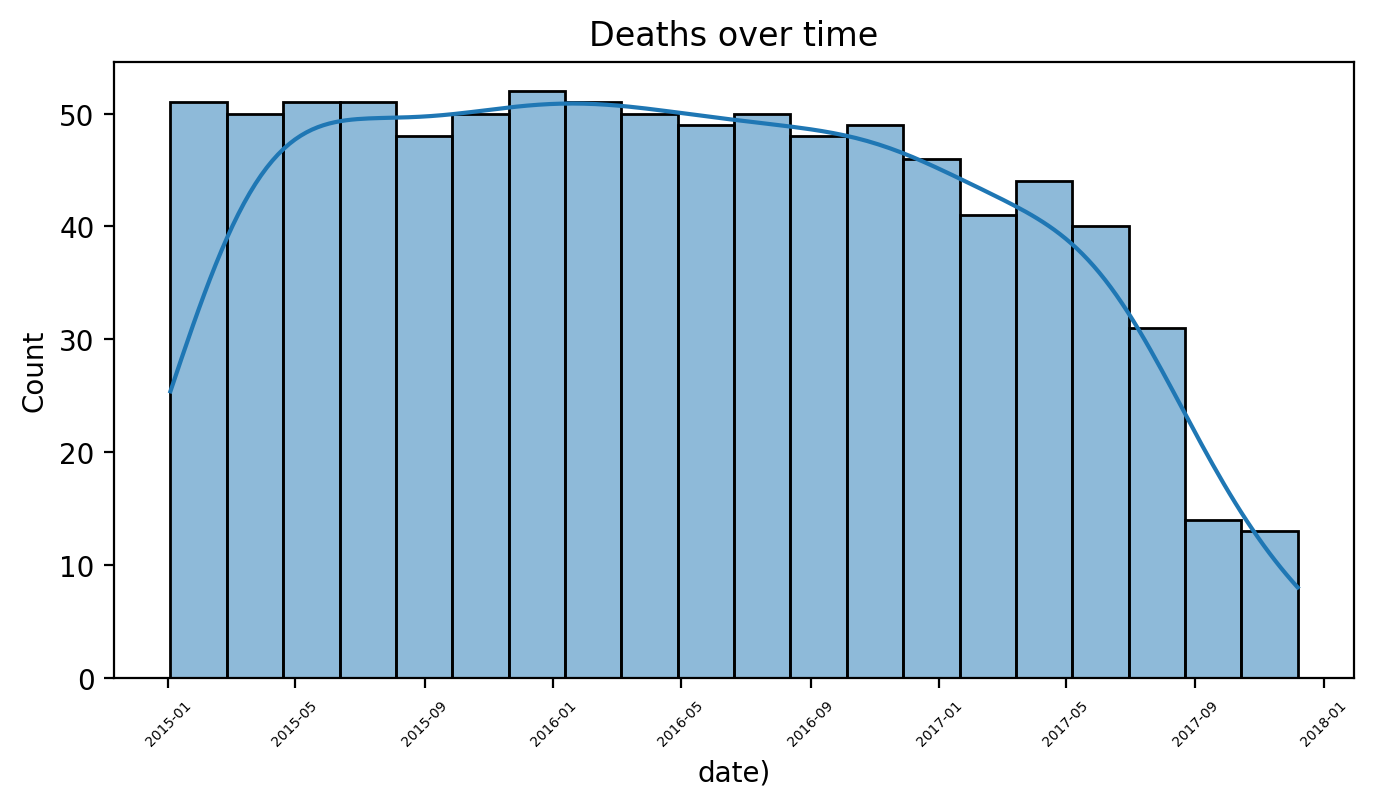

In [117]:
# px.line(
#     df,
#     x='date',
#     y='size',
#     kde=True
# )
plt.figure(
    figsize=(
        8,
        4
    ),
    dpi=200
)
sns.histplot(
    data=df,
    x=df.date,
    kde=True,
    bins=20

)

plt.xlabel('date)')
plt.xticks(rotation = 45, fontsize=5)
plt.title('Deaths over time')
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).